# Pittsburgh's Best Neighborhood

## Group Members: Chris Trostel, Charlotte Oberti, Nick Cheddar

## Group Name: Pittsburgh Think Tank

#### Metrics: Public Art, Libraries and Parks

#### Data Sets: 
* libraries.csv
* Public-Art.csv
* CityParks.csv


# Libraries

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
libraries = pd.read_csv("libraries.csv")
libraries.head(50)

,_id,CLPID,Name,Address,City,State,Zip4,County,Phone,SqFt,...,ThOpen,ThClose,FrOpen,FrClose,SaOpen,SaClose,SuOpen,SuClose,Lat,Lon
0,2,CLP01,ALLEGHENY LIBRARY,1230 FEDERAL ST,PITTSBURGH,PA,15212-4704,Allegheny,(412) 237-1890,15005,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,12:00:00,17:00:00,40.456392,-80.006613
1,3,CLP02,BEECHVIEW LIBRARY,1910 BROADWAY AVE,PITTSBURGH,PA,15216-3130,Allegheny,(412) 563-2900,8000,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.407026,-80.027741
2,4,CLP03,BROOKLINE LIBRARY,708 BROOKLINE BLVD,PITTSBURGH,PA,15226-2102,Allegheny,(412) 561-1003,12651,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.394399,-80.021427
3,5,CLP04,CARRICK LIBRARY,1811 BROWNSVILLE RD,PITTSBURGH,PA,15210-3907,Allegheny,(412) 882-3897,4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.397019,-79.987547
4,6,CLP05,DOWNTOWN & BUSINESS LIBRARY,612 SMITHFIELD ST,PITTSBURGH,PA,15222-2506,Allegheny,(412) 281-7141,12709,...,08:30:00,18:00:00,08:30:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.441749,-79.997112
5,7,CLP06,EAST LIBERTY LIBRARY,130 SOUTH WHITFIELD ST,PITTSBURGH,PA,15206-3806,Allegheny,(412) 363-8232,40000,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.460963,-79.926502
6,8,CLP07,HAZELWOOD LIBRARY,5006 SECOND AVE,PITTSBURGH,PA,15207-1625,Allegheny,(412) 421-2517,7000,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.409805,-79.943849
7,9,CLP08,HILL DISTRICT LIBRARY,2177 CENTRE AVE,PITTSBURGH,PA,15219-6316,Allegheny,(412) 281-3753,8333,...,10:00:00,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.445471,-79.976706
8,10,CLP09,HOMEWOOD LIBRARY,7101 HAMILTON AVE,PITTSBURGH,PA,15208-2847,Allegheny,(412) 731-3080,28776,...,10:00:00,20:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.455284,-79.899213
9,11,CLP10,KNOXVILLE LIBRARY,400 BROWNSVILLE RD,PITTSBURGH,PA,15210-2251,Allegheny,(412) 381-6543,6700,...,10:00:00,17:00:00,10:00:00,17:00:00,10:00:00,17:00:00,NaN,NaN,40.413186,-79.989149


### The best neighborhoods would be the ones that have libraries open for the most amount of hours. If we want to compare neighborhoods, we can order this information by zip code.

In [3]:
import csv

with open('libraries.csv') as f:
    data = [row for row in csv.reader(f)]
    zip_codes = []
    for row in data[1:]: # skip the header row using a list slice
        zip_codes.append(row[6])

print(zip_codes)

['15212-4704', '15216-3130', '15226-2102', '15210-3907', '15222-2506', '15206-3806', '15207-1625', '15219-6316', '15208-2847', '15210-2251', '15201-2898', '15213-1321', '15213-4080', '15211-1549', '15204-1724', '15203-2107', '15217-1601', '15220-5422', '15212-2335']


In [4]:
# load data
lib_data = pd.read_csv("libraries.csv",index_col="_id")
first_five_digits = lib_data['Zip4'].str[:5]
first_five_digits.value_counts().sort_values(ascending=True)

15216    1
15226    1
15222    1
15206    1
15207    1
15219    1
15208    1
15201    1
15211    1
15204    1
15203    1
15217    1
15220    1
15212    2
15210    2
15213    2
Name: Zip4, dtype: int64

Now let's show this information in a bar graph.

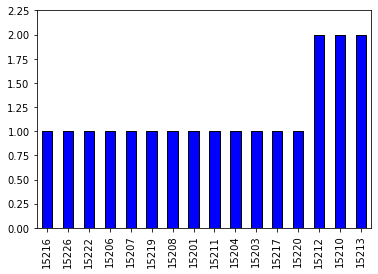

In [5]:
# load data
lib_data = pd.read_csv("libraries.csv",index_col="_id")
first_five_digits = lib_data['Zip4'].str[:5]
first_five_digits.value_counts().sort_values(ascending=True)

# Count the frequency of each value
value_counts = first_five_digits.value_counts().sort_values(ascending=True)

# Plot the frequencies as a bar plot
value_counts.plot(kind="bar")

# This is what happens when scientists do visual design
plt.style.use('classic')
value_counts.plot.bar(stacked=True)

# Show the plot
plt.show()

From this, we can see there are a couple neighborhoods that have multiple libraries. They are the neighborhoods with zip codes: 15212, 15210, and 15213. Perry South, St. Clair, and North Oakland.

### Next, we want to sort by the libraries that are open on saturdays and sundays.

In [7]:
# concatinate two series together
ser1 = lib_data['SuOpen']
ser2 = lib_data['Zip4'].str[:5]

# note the Series are passed as a list
hours = pd.concat([ser1, ser2], axis=1)
print(pd.concat([ser1, ser2], axis=1))

       SuOpen   Zip4
_id                 
2    12:00:00  15212
3         NaN  15216
4         NaN  15226
5         NaN  15210
6         NaN  15222
7         NaN  15206
8         NaN  15207
9         NaN  15219
10        NaN  15208
11        NaN  15210
12        NaN  15201
13        NaN  15213
14   12:00:00  15213
15        NaN  15211
16        NaN  15204
17   12:00:00  15203
18   12:00:00  15217
19        NaN  15220
20        NaN  15212


Now let's show this with a visualization.

SuOpen    Zip4 
12:00:00  15203    1
          15212    1
          15213    1
          15217    1
dtype: int64

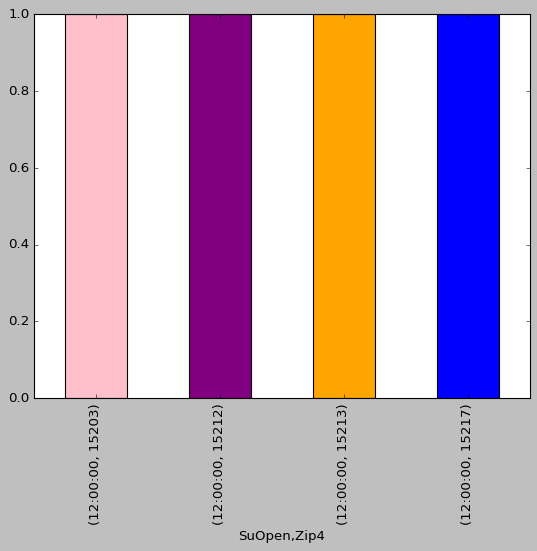

In [8]:
# Count the frequency of each value
hours_counts = hours.value_counts().sort_values(ascending=True)
hours_counts.droplevel('SuOpen')
display(hours_counts)

# Plot the frequencies as a bar plot
hours_counts.plot(kind="bar", color=["pink", "purple", "orange", "blue"])

# Show the plot
plt.show()



From this, we see that the only neighborhoods that have libraries open on Sundays, are 15212, 15213, 15203, and 15217. Perry South, North Oakland, South Side Slopes, and Squirrel Hill South, respectively.

### Conclusion

From this data, we can say the best neighborhoods are Perry South, North Oakland, South Slopes Slopes, Squirrel Hill South, and St. Clair. Recognizing that Perry South and North Oakland appeared for both categories of data.

Link to original WPRDC: https://data.wprdc.org/dataset/libraries

# Public Art

#### Below is the original data set that has each piece of public art and describes in what neighborhood that piece of art lives in.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv("Public-Art.csv", )
data

,_id,id,name,title,artist_name,art_type,park,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,812728309,1001,Oakwood Road Monument,NaN,NaN,NaN,NaN,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429192,-80.066225
1,2,188255168,1002,Rooster Waiting For The Streetcar,James Simon,Modern and Contemporary Art,NaN,NaN,Elliott,2.0,20.0,4.200356e+10,5.0,20.0,6.0,1-17,40.442926,-80.039711
2,3,2032091917,129,Middle East Memorial Plaque,NaN,War Memorials,NaN,NaN,Central Business District,6.0,1.0,4.200302e+10,6.0,1.0,2.0,1-4,40.438092,-79.996852
3,4,1447629273,143,L'Enfant,Paul Roger-Bloche,Historic Art,NaN,NaN,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,40.388748,-79.986497
4,5,1935017944,148,Veterans Memorial (Brookline),NaN,War Memorials,Brookline Monument,NaN,Brookline,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-26,40.391721,-80.016981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,1089921133,WM00099000,17th Ward Veterans Memorial,NaN,Non-City Owned,NaN,NaN,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-24,40.428635,-79.980443
195,196,191395610,WM00101000,Saint Josephat Honor Roll,NaN,Non-City Owned,NaN,NaN,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-22,40.423129,-79.973486
196,197,628976107,WM00102000,World War II Momument,NaN,Non-City Owned,NaN,NaN,Spring Garden,1.0,26.0,4.200324e+10,1.0,26.0,1.0,1-11,40.471780,-79.986670
197,198,1309894649,WM00105000,Korean War Veterans Memorial,R. Allan Christianson (Architect),War Memorials,Northshore Riverfront Park,NaN,North Shore,1.0,22.0,4.200398e+10,6.0,22.0,1.0,1-7,40.445726,-80.008082


#### Below is a more simplified version of the graph counting how many pieces of art are in one neighborhood then ranking it from greatest to least.

In [2]:
neighborhood_counts = data['neighborhood'].value_counts()

print("Counts of each neighborhood value:")
print(neighborhood_counts)

Counts of each neighborhood value:
Central Business District    27
Squirrel Hill South          20
Allegheny Center             18
Highland Park                10
South Side Flats              9
North Shore                   8
Beechview                     7
Shadyside                     6
Central Oakland               5
Lower Lawrenceville           5
Brighton Heights              5
Spring Hill-City View         4
Crawford-Roberts              3
Greenfield                    3
Elliott                       3
Beltzhoover                   3
Hazelwood                     3
South Side Slopes             3
Duquesne Heights              3
Point Breeze                  3
Garfield                      2
Upper Hill                    2
Central Lawrenceville         2
Spring Garden                 2
Mount Washington              2
Allentown                     2
Strip District                2
Lincoln-Lemington-Belmar      2
Squirrel Hill North           2
East Allegheny                2
West 

#### Below is the date above but in graph form, allowing us to see the drastic difference in the neighborhoods.

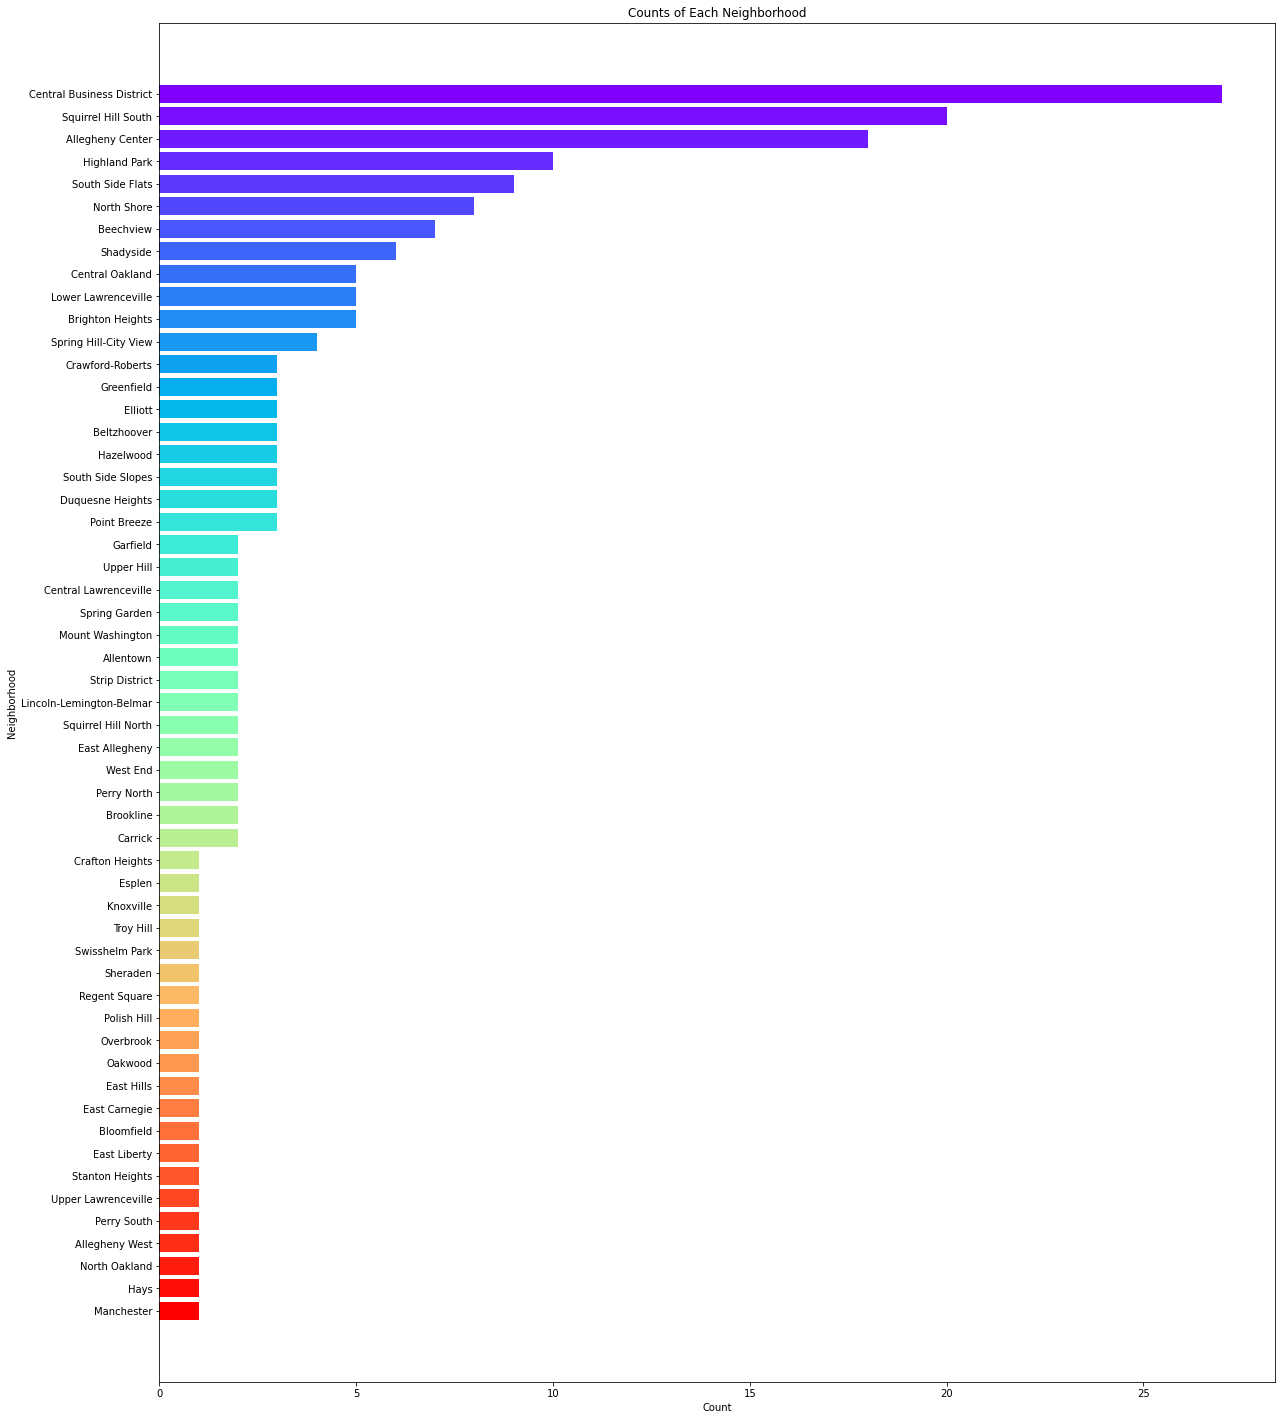

In [4]:
neighborhood_counts_df = neighborhood_counts.reset_index()
neighborhood_counts_df.columns = ['neighborhood', 'count']

num_bars = len(neighborhood_counts_df)
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

plt.figure(figsize=(20, 25))
plt.barh(neighborhood_counts_df['neighborhood'], neighborhood_counts_df['count'], color=colors)
plt.xlabel('Count')
plt.ylabel('Neighborhood')
plt.title('Counts of Each Neighborhood')
plt.gca().invert_yaxis()
plt.show()

### Conclusion

Originally I am not from around Pittsburgh, however I was under the impression that the top neighborhood would be one of the more wealthier neghborhoods, but I was proven wrong. Based on the graph and data I have collected it is safe to assume that the top three neighborhoods in pittsburgh are the Central Business District, Squirrell Hill South, and Allegheny Center and the the best neighborhood overall has to be one of these.

# Parks

In [6]:
import pandas as pd
import geopandas
%matplotlib inline

In [7]:
park= pd.read_csv("CityParks.csv")

neighborhood_count=park['neighborhood'].value_counts()

neighborhood_count=pd.DataFrame(neighborhood_count)

neighborhood_count=neighborhood_count.reset_index().rename(columns={"index":"area"})

print(neighborhood_count)

display(park)

                         area  neighborhood
0                East Liberty            12
1   Central Business District            10
2                   Beechview             8
3           South Side Slopes             7
4                Point Breeze             7
..                        ...           ...
68                       Hays             1
69                  Arlington             1
70            Stanton Heights             1
71                Morningside             1
72        Squirrel Hill North             1

[73 rows x 2 columns]


,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,205,1460363095,Woods Run Park,Park,Parks - Northern,https://tools.wprdc.org/images/pittsburgh/park...,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.476383,-80.029253
205,206,930068146,Young Field Park,Park,Parks - Northern,NaN,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.472963,-80.032768
206,207,1127012019,Zulema Park,Park,Parks - Schenley,NaN,Central Oakland,3,4,42003040500,3,4,4,2-14,40.435693,-79.957048
207,208,1719897212,Liberty Green Park,Park,Parks - Northeast,NaN,East Liberty,9,11,42003111500,2,11,5,3-10,40.462773,-79.919314


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    90 non-null     int64   
 1   fid_blockg  89 non-null     float64 
 2   statefp10   89 non-null     object  
 3   countyfp10  89 non-null     object  
 4   tractce10   89 non-null     object  
 5   blkgrpce10  89 non-null     object  
 6   geoid10     89 non-null     object  
 7   namelsad10  89 non-null     object  
 8   mtfcc10     89 non-null     object  
 9   funcstat10  89 non-null     object  
 10  aland10     89 non-null     float64 
 11  awater10    89 non-null     float64 
 12  intptlat10  89 non-null     object  
 13  intptlon10  89 non-null     object  
 14  shape_leng  89 non-null     float64 
 15  fid_neighb  89 non-null     float64 
 16  area        89 non-null     float64 
 17  perimeter   89 non-null     float64 
 18  neighbor_   89 non-null     float64 
 19  ne

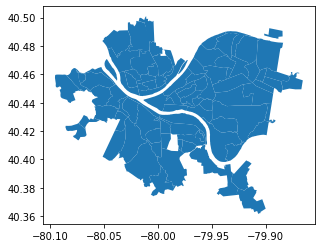

In [8]:

neighborhoods = geopandas.read_file("Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
print(neighborhoods.info())

In [9]:
park= pd.read_csv("CityParks.csv")
# do the merge
parks= neighborhoods.merge(neighborhood_count, how='left', left_on='hood', right_on='area')
# look at the head to confirm it merged correctly
parks[['hood','neighborhood','geometry']].head()

,hood,neighborhood,geometry
0,Central Oakland,4.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,1.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,3.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,2.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


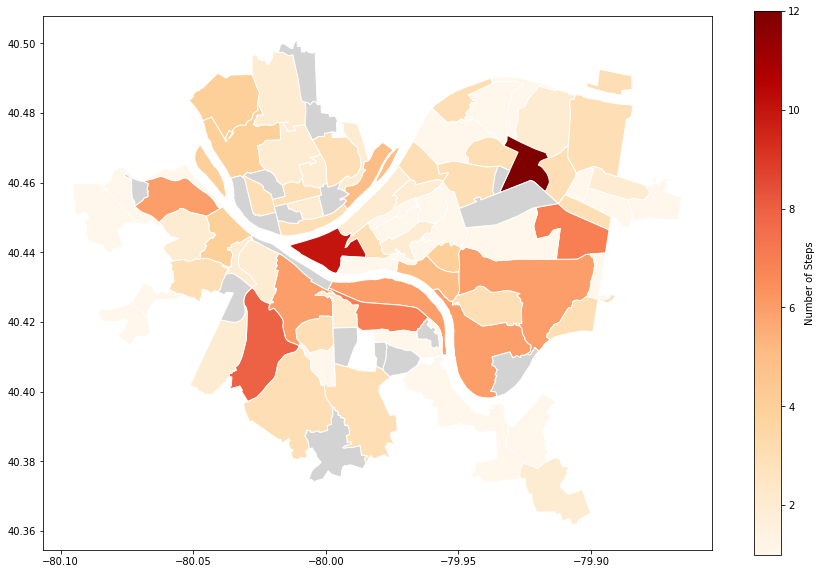

In [10]:
parks.plot(column='neighborhood', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Conclusion


The data from the graph shows that the neighborhood East Liberty has the most Parks at 12.

## Final Conclusion

The neighborhood that proves to be the best neighborhood is Squirrel Hill South as that is the nieghborhood that occurs in all of our top 3 neighborhoods.